# Linguistics 110: Closure and Voice-Onset Time

### Professor Susan Lin

This notebook will familiarize you with some of the basic strategies for data analysis that can be useful not only in this course, but possibly for the rest of your time at Cal. We will cover an overview of our computing environment, and then will explore the data on closure and VOT that you submit. 

If you want a more in-depth introduction to Python, click <a href='http://datahub.berkeley.edu/user-redirect/interact?account=ds-modules&repo=LINGUIS-110&branch=master&path=Intro'>here</a> to explore that notebook. You should be able to get through this entire notebook without that tutorial, it is there if you want to dive deeper into what is going on in the code.

## Table of Contents

1 - [Computing Environment](#computing environment)

2 - [Creating our Dataframe](#dataframe)

3 - [Exploring the Data](#exploring data)

4 - [Relationships between Closures](#closures)

5 - [Exploring Metadata](#metadata)

6 - [Comparing to Others](#to class)

## 1. Our Computing Environment, Jupyter notebooks  <a id='computing environment'></a>

This webpage is called a Jupyter notebook. A notebook is a place to write programs and view their results. 

### Text cells
In a notebook, each rectangle containing text or code is called a *cell*.

Text cells (like this one) can be edited by double-clicking on them. They're written in a simple format called [Markdown](http://daringfireball.net/projects/markdown/syntax) to add formatting and section headings.  You don't need to learn Markdown, but you might want to.

After you edit a text cell, click the "run cell" button at the top that looks like ▶| to confirm any changes. (Try not to delete the instructions of the lab.)

**Understanding Check 1** This paragraph is in its own text cell.  Try editing it so that this sentence is the last sentence in the paragraph, and then click the "run cell" ▶| button .  This sentence, for example, should be deleted.  So should this one.

A programming language is a vocabulary and set of grammatical rules for instructing a computer or computing device to perform specific tasks.

### Code cells
Other cells contain code in the Python 3 language. Just like natural human languages, it has rules -- Python is a programming language, which means that it is a set of grammatical rules and vocabulary for instructing a computer to perform tasks. It differs from natural language in two important ways:
1. The rules are *simple*.  You can learn most of them in a few weeks and gain reasonable proficiency with the language in a semester.
2. The rules are *rigid*.  If you're proficient in a natural language, you can understand a non-proficient speaker, glossing over small mistakes.  A computer running Python code is not smart enough to do that.

There's a lot of terminology in programming languages, but you don't need to know it all in order to program effectively. From time to time, you'll see a cryptic message, but you can often get by without deciphering it, by utilizing appropriate resources (sometimes it's as simple as a Google search).

Running a code cell will execute all of the code it contains. 

To run the code in a code cell, first click on that cell to activate it.  It'll be highlighted with a little green or blue rectangle.  Next, either press ▶| or hold down the `shift` key and press `return` or `enter`.

Try running this cell:

In [4]:
print("Hello, World!")

Hello, World!


The fundamental building block of Python code is an expression. Cells can contain multiple lines with multiple expressions. When you run a cell, the lines of code are executed in the order in which they appear. Every `print` expression prints a line. Run the next cell and notice the order of the output.

In [5]:
print("First this line is printed,")
print("and then this one.")

First this line is printed,
and then this one.


### Writing Jupyter notebooks
You can use Jupyter notebooks for your own projects or documents.  When you make your own notebook, you'll need to create your own cells for text and code.

To add a cell, click the + button in the menu bar.  It'll start out as a text cell.  You can change it to a code cell by clicking inside it so it's highlighted, clicking the drop-down box next to the restart (⟳) button in the menu bar, and choosing "Code".

### Other important things to know about the notebook
+ Click `File > Save and Checkpoint` to save the notebook.
+ This page runs on remote servers, meaning that when you run a cell, the code is sent somewhere else to be interpreted, then sends the results back to you to be displayed. So if you notice that it doesn't seem to be running anymore, try steps in this order:
    1. Click `Kernel > Interrupt`, then try running the cell again.
    2. Click `Kernel > Restart`, then run through all of the cells.
    3. Close and reopen DataHub.
+ Plots created in the notebook can be copied and pasted by right-clicking and selecting copy.
+ If you want to run all of the cells at once, click `Cell > Run All`.

Run the cell below so that we can get started on our module! These are our import statements (and a few other things). Because of the size of the Python community, if there is a function that you want to use, there is a good chance that someone has written one already and been kind enough to share their work in the form of packages. We can start using those packages by writing `import` and then the package name.

In [6]:
# imports -- just run this cell
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import mode
from ipywidgets import interact
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import warnings

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
%matplotlib inline

## 2. Creating our Dataframe <a id='dataframe'></a>
We will start by familiarizing ourselves with the data.

To visualize the data, we need to load the file first. In the line where we we assign `file_name` to equal the name of our dataset, which is a compilation of the results from the homework you completed last week.

Note that we have `data/` in front of the file name, which means that are file `example_data.csv` is in the `data` directory (folder).

In [7]:
file_name = 'data/example_data.csv'
data = pd.read_csv(file_name)
data.head()

,language,height,pclo,tclo,kclo,pvot,tvot,kvot,bclo,dclo,gclo,bvot,dvot,gvot
0,English,162.50,0.022,0.0207,0.0262,0.086985,0.087877,0.091621,-0.078,-0.0793,-0.0738,-0.013015,-0.012123,-0.008379
1,English,177.00,0.081,0.0320,0.0390,0.072000,0.049000,0.043000,-0.019,-0.0680,-0.0610,-0.028000,-0.051000,-0.057000
2,English,170.18,0.070,0.0700,0.0700,0.150000,0.230000,0.120000,-0.030,-0.0300,-0.0300,0.050000,0.130000,0.020000
3,English,178.00,0.034,0.0560,0.0290,0.170000,0.190000,0.077000,-0.066,-0.0440,-0.0710,0.070000,0.090000,-0.023000
4,English,177.80,0.144,0.0940,0.0630,0.132000,0.153000,0.177000,0.044,-0.0060,-0.0370,0.032000,0.053000,0.077000


### 2.1 Adding features from our data

We are going to add several columns to our dataframe. A column for each of the following:
+ The semester of this class (called `class`)
+ Average of all closure/vot for each individual (called `clo`/`vot`)
+ Average voiced closure/vot for each individual (called `vclo`/`vvot`)
+ Average voiceless closure/vot for each individual (called `vlclo`/`vlvot`)

First we are just going to add the column `class`. We will set it to be equal to `Fall 2017` for each row.

In [8]:
data['class'] = 'Fall 2017'
data.head()

,language,height,pclo,tclo,kclo,pvot,tvot,kvot,bclo,dclo,gclo,bvot,dvot,gvot,class
0,English,162.50,0.022,0.0207,0.0262,0.086985,0.087877,0.091621,-0.078,-0.0793,-0.0738,-0.013015,-0.012123,-0.008379,Fall 2017
1,English,177.00,0.081,0.0320,0.0390,0.072000,0.049000,0.043000,-0.019,-0.0680,-0.0610,-0.028000,-0.051000,-0.057000,Fall 2017
2,English,170.18,0.070,0.0700,0.0700,0.150000,0.230000,0.120000,-0.030,-0.0300,-0.0300,0.050000,0.130000,0.020000,Fall 2017
3,English,178.00,0.034,0.0560,0.0290,0.170000,0.190000,0.077000,-0.066,-0.0440,-0.0710,0.070000,0.090000,-0.023000,Fall 2017
4,English,177.80,0.144,0.0940,0.0630,0.132000,0.153000,0.177000,0.044,-0.0060,-0.0370,0.032000,0.053000,0.077000,Fall 2017


Next we will add the column for the average of all of the closures for each row. First we will pull out just the columns that we want to take the average of.

In [9]:
subset = data[['pclo', 'tclo', 'kclo', 'bclo', 'dclo', 'gclo']]
subset.head()

,pclo,tclo,kclo,bclo,dclo,gclo
0,0.022,0.0207,0.0262,-0.078,-0.0793,-0.0738
1,0.081,0.0320,0.0390,-0.019,-0.0680,-0.0610
2,0.070,0.0700,0.0700,-0.030,-0.0300,-0.0300
3,0.034,0.0560,0.0290,-0.066,-0.0440,-0.0710
4,0.144,0.0940,0.0630,0.044,-0.0060,-0.0370


Then we will take the average across those rows.

In [10]:
clo_avg = subset.mean(axis=1)
clo_avg

0    -0.027033
1     0.000667
2     0.020000
3    -0.010333
4     0.050333
5     0.105667
6     0.082664
7     0.048000
8     0.022115
9     0.072333
10    0.063333
11    0.073667
12    0.011000
13    0.071667
14    0.020000
15    0.005185
16    0.013633
17    0.033000
18    0.151000
19    0.007667
20    0.015333
21    0.028172
22    0.035000
23    0.072293
24   -0.032992
25    0.135900
26    0.093600
27    0.033067
28    0.094817
29    0.048361
        ...   
57    0.050733
58   -0.008000
59    0.028000
60   -0.024667
61    0.047156
62    0.023667
63   -0.011167
64   -0.042640
65    0.020143
66    0.009248
67    0.013000
68    0.088483
69    0.061667
70   -0.012767
71    0.026000
72    0.041035
73    0.037219
74    0.006860
75    0.068000
76   -0.004000
77    0.010000
78    0.023103
79    0.056350
80    0.040333
81    0.024403
82    0.009533
83   -0.021998
84    0.023667
85    0.005493
86   -0.019333
dtype: float64

And finally, we will append those values to our dataframe as a column called `clo`.

In [11]:
data['clo'] = clo_avg
data.head()

,language,height,pclo,tclo,kclo,pvot,tvot,kvot,bclo,dclo,gclo,bvot,dvot,gvot,class,clo
0,English,162.50,0.022,0.0207,0.0262,0.086985,0.087877,0.091621,-0.078,-0.0793,-0.0738,-0.013015,-0.012123,-0.008379,Fall 2017,-0.027033
1,English,177.00,0.081,0.0320,0.0390,0.072000,0.049000,0.043000,-0.019,-0.0680,-0.0610,-0.028000,-0.051000,-0.057000,Fall 2017,0.000667
2,English,170.18,0.070,0.0700,0.0700,0.150000,0.230000,0.120000,-0.030,-0.0300,-0.0300,0.050000,0.130000,0.020000,Fall 2017,0.020000
3,English,178.00,0.034,0.0560,0.0290,0.170000,0.190000,0.077000,-0.066,-0.0440,-0.0710,0.070000,0.090000,-0.023000,Fall 2017,-0.010333
4,English,177.80,0.144,0.0940,0.0630,0.132000,0.153000,0.177000,0.044,-0.0060,-0.0370,0.032000,0.053000,0.077000,Fall 2017,0.050333


We then repeat this process for all of the other columns that we want to create.

In [12]:
data['vot'] = data[['pvot', 'tvot', 'kvot', 'bvot', 'dvot', 'gvot']].mean(axis=1)
data['vclo'] = data[['pclo', 'tclo', 'kclo']].mean(axis=1)
data['vvot'] = data[['pvot', 'tvot', 'kvot']].mean(axis=1)
data['vlclo'] = data[['bclo', 'dclo', 'gclo']].mean(axis=1)
data['vlvot'] = data[['bvot', 'dvot', 'gvot']].mean(axis=1)
data.head()

,language,height,pclo,tclo,kclo,pvot,tvot,kvot,bclo,dclo,...,bvot,dvot,gvot,class,clo,vot,vclo,vvot,vlclo,vlvot
0,English,162.50,0.022,0.0207,0.0262,0.086985,0.087877,0.091621,-0.078,-0.0793,...,-0.013015,-0.012123,-0.008379,Fall 2017,-0.027033,0.038828,0.022967,0.088828,-0.077033,-0.011172
1,English,177.00,0.081,0.0320,0.0390,0.072000,0.049000,0.043000,-0.019,-0.0680,...,-0.028000,-0.051000,-0.057000,Fall 2017,0.000667,0.004667,0.050667,0.054667,-0.049333,-0.045333
2,English,170.18,0.070,0.0700,0.0700,0.150000,0.230000,0.120000,-0.030,-0.0300,...,0.050000,0.130000,0.020000,Fall 2017,0.020000,0.116667,0.070000,0.166667,-0.030000,0.066667
3,English,178.00,0.034,0.0560,0.0290,0.170000,0.190000,0.077000,-0.066,-0.0440,...,0.070000,0.090000,-0.023000,Fall 2017,-0.010333,0.095667,0.039667,0.145667,-0.060333,0.045667
4,English,177.80,0.144,0.0940,0.0630,0.132000,0.153000,0.177000,0.044,-0.0060,...,0.032000,0.053000,0.077000,Fall 2017,0.050333,0.104000,0.100333,0.154000,0.000333,0.054000


# 3. Exploring the Data <a id='exploring data'></a>

### 3.1 Descriptive Statistics
Below we compute the some basic properties about the column `clo`.

In [13]:
closure_mode = mode(data.clo)[0][0]
print('Mode: ', closure_mode)

data.clo.describe()

Mode:  -0.0426404333333


count    87.000000
mean      0.034279
std       0.037605
min      -0.042640
25%       0.009391
50%       0.028172
75%       0.056342
max       0.151000
Name: clo, dtype: float64

We can calculate all of the above statistics for the entire table with one line.

In [14]:
data.describe()

,height,pclo,tclo,kclo,pvot,tvot,kvot,bclo,dclo,gclo,bvot,dvot,gvot,clo,vot,vclo,vvot,vlclo,vlvot
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,168.091609,0.091137,0.083097,0.078603,0.081617,0.091156,0.095466,-0.008863,-0.016903,-0.021397,-0.018383,-0.008844,-0.004534,0.034279,0.039413,0.084279,0.089413,-0.015721,-0.010587
std,9.909155,0.043835,0.039368,0.037421,0.028761,0.034135,0.069755,0.043835,0.039368,0.037421,0.028761,0.034135,0.069755,0.037605,0.031818,0.037605,0.031818,0.037605,0.031818
min,132.000000,0.007953,0.006938,0.007188,0.016649,0.007000,0.009497,-0.092047,-0.093062,-0.092812,-0.083351,-0.093000,-0.090503,-0.042640,-0.031000,0.007360,0.019000,-0.092640,-0.081000
25%,162.000000,0.068500,0.056000,0.051089,0.059875,0.072994,0.074500,-0.031500,-0.044000,-0.048911,-0.040125,-0.027006,-0.025500,0.009391,0.022667,0.059391,0.072667,-0.040609,-0.027333
50%,167.640000,0.084000,0.075000,0.073000,0.081000,0.092763,0.088521,-0.016000,-0.025000,-0.027000,-0.019000,-0.007237,-0.011479,0.028172,0.036333,0.078172,0.086333,-0.021828,-0.013667
75%,176.130000,0.122672,0.112329,0.100968,0.099845,0.105190,0.105250,0.022672,0.012329,0.000967,-0.000155,0.005189,0.005250,0.056342,0.051473,0.106342,0.101473,0.006342,0.001472
max,185.420000,0.245000,0.179170,0.204000,0.170000,0.230000,0.672280,0.145000,0.079170,0.104000,0.070000,0.130000,0.572280,0.151000,0.211897,0.201000,0.261897,0.101000,0.161897


### 3.2 Data Visualization
Now that we have our data in order, let's get a picture of the data with some plots.

Let's start by visualizing the distribution of `vot` with a histogram.

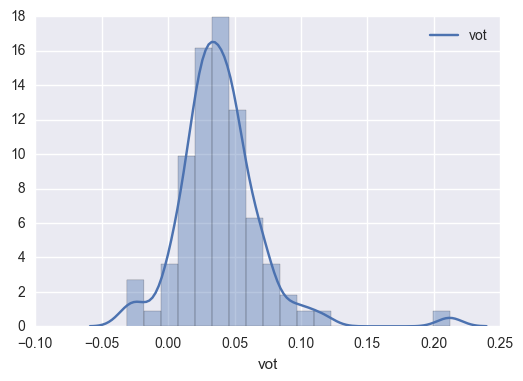

In [15]:
sns.distplot(data['vot'], kde_kws={"label": "vot"})

Next, we'll compare the distributions of the voiced and voiceless voice-onset times.

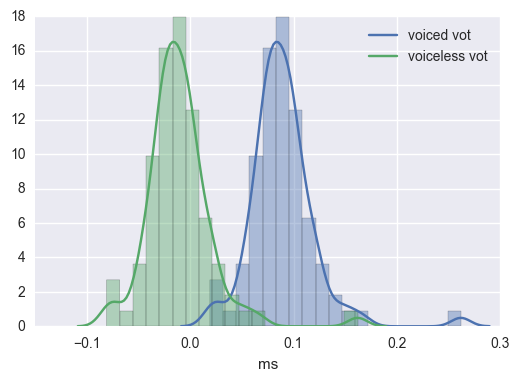

In [16]:
sns.distplot(data['vvot'], kde_kws={"label": "voiced vot"})
sns.distplot(data['vlvot'], kde_kws={"label": "voiceless vot"})
plt.xlabel('ms')

The distributions of the three voiced stops are below.

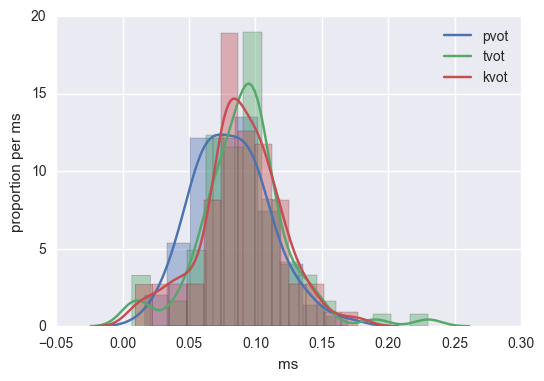

In [17]:
# change back the third line before release (outlier was making it look )
sns.distplot(data['pvot'], kde_kws={"label": "pvot"})
sns.distplot(data['tvot'], kde_kws={"label": "tvot"})
sns.distplot(sorted(list(data['kvot']))[:-1], kde_kws={"label": "kvot"})

plt.xlabel('ms')
plt.ylabel('proportion per ms')

The distributions of the three voiceless stops are below.

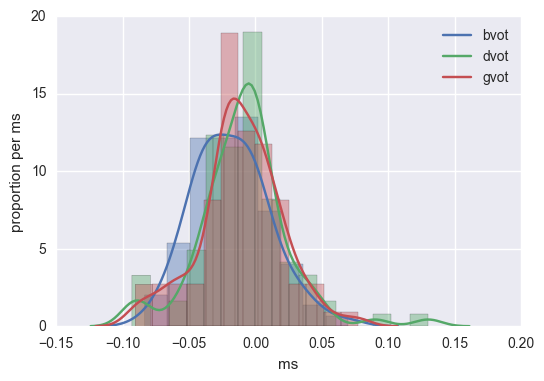

In [18]:
sns.distplot(data['bvot'], kde_kws={"label": "bvot"})
sns.distplot(data['dvot'], kde_kws={"label": "dvot"})
sns.distplot(sorted(list(data['gvot']))[:-1], kde_kws={"label": "gvot"})

plt.xlabel('ms')
plt.ylabel('proportion per ms')

Below, we will see the number of people who speak each language.

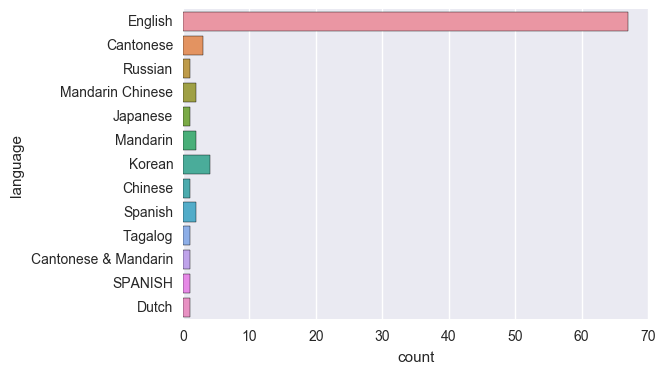

In [19]:
sns.countplot(y="language", data=data)

Below, we have a the distribution of height.

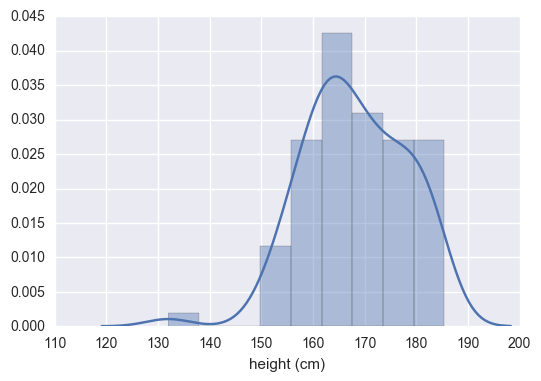

In [20]:
sns.distplot(data['height'])

plt.xlabel('height (cm)')

# 4. Relationships between closures <a id='closures'></a>

Now will will shift back away from single column visualizations, and start to compare values between columns, looking specifically at the different closures in our dataframe. Run the cell below that will automate some of plotting for us.

In [32]:
def plot_with_equality_line(xs, ys, best_fit=False):
    fig, ax = plt.subplots()
    sns.regplot(xs, ys, fit_reg=best_fit, ax=ax)

    lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
    ax.plot(lims, lims, '--', alpha=0.75, zorder=0, c='black')
    ax.set_xlim(lims)
    ax.set_ylim(lims)

### 4.1 Using a line where x = y

We'll start by making scatter plots. They takes the values (from identified columns) of individual rows, and plots them as a dot on our coordinate plane. So in the plot below, each point will represent a person's `tclo` and `pclo`. We are going to plot a dashed line that marks where the x-values are equal to the y-values, which helps us visualize 

In [ ]:
TODO: Need to finish this text

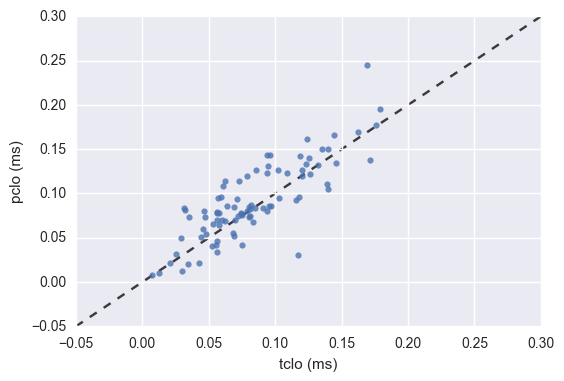

In [33]:
plot_with_equality_line(data['tclo'], data['pclo'])

plt.xlabel('tclo (ms)')
plt.ylabel('pclo (ms)')

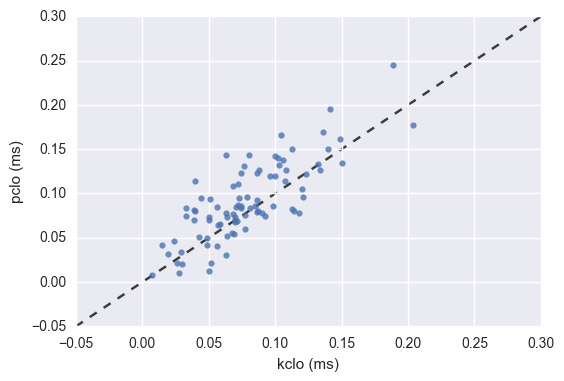

In [34]:
plot_with_equality_line(data['kclo'], data['pclo'])

plt.xlabel('kclo (ms)')
plt.ylabel('pclo (ms)')

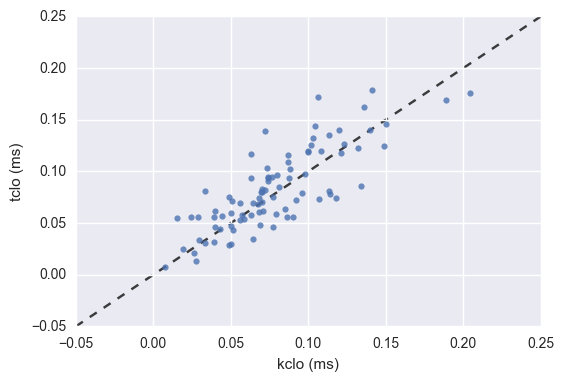

In [35]:
plot_with_equality_line(data['kclo'], data['tclo'])

plt.xlabel('kclo (ms)')
plt.ylabel('tclo (ms)')

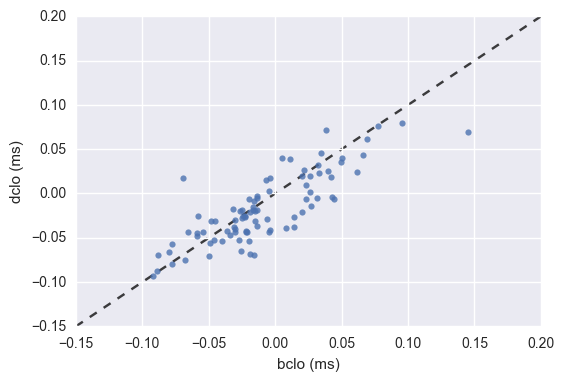

In [36]:
plot_with_equality_line(data['bclo'], data['dclo'])

plt.xlabel('bclo (ms)')
plt.ylabel('dclo (ms)')

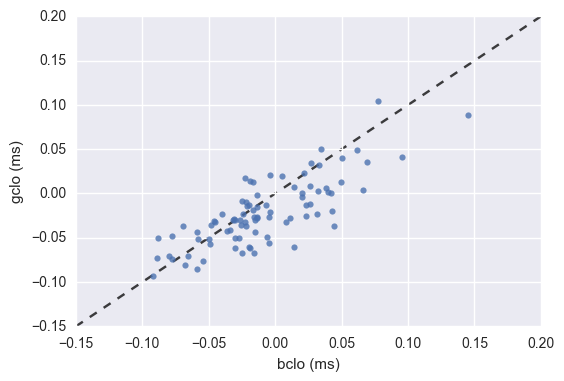

In [37]:
plot_with_equality_line(data['bclo'], data['gclo'])

plt.xlabel('bclo (ms)')
plt.ylabel('gclo (ms)')

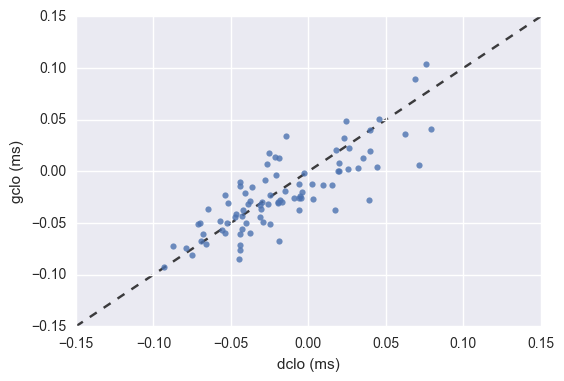

In [38]:
plot_with_equality_line(data['dclo'], data['gclo'])

plt.xlabel('dclo (ms)')
plt.ylabel('gclo (ms)')

### 4.2 Using box-and-whisker plots

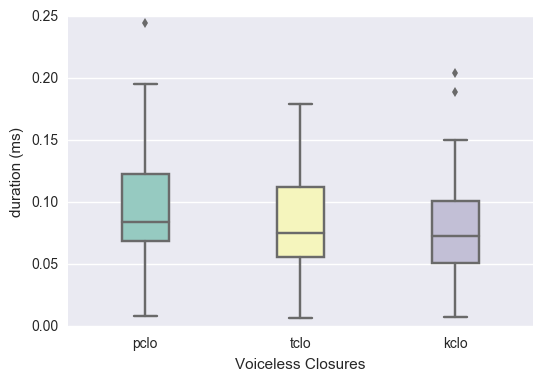

In [28]:
sns.boxplot(data[['pclo', 'tclo', 'kclo']], width=.3, palette="Set3")

plt.ylabel('duration (ms)')
plt.xlabel('Voiceless Closures')

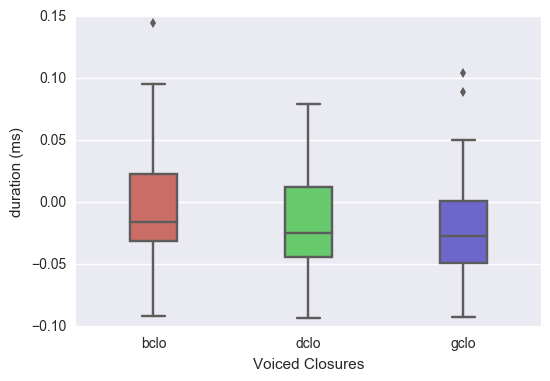

In [29]:
sns.boxplot(data[['bclo', 'dclo', 'gclo']], width=.3, palette="hls")

plt.ylabel('duration (ms)')
plt.xlabel('Voiced Closures')

# 5. Explore relationships to metadata <a id='metadata'></a>
Now let's explore relationships between closure and different characteristics of the persons who delivered those stats, looking at language and height. We'll draw scatter plots to see whether there are linear relationships between them.

### 5.1 Language
Before we look at the actual relationship, it is important to realize any potential limitations of our observations. If you look back up to the bar plot of different native languages, you will see that the majority speak English. 

Question: if we try to come up with conclusion about people who speak Tagalog/Dutch, would the conclusions be reliable and why?

Here, each dot is a person and you can see what language they speak and their respective closure measurement.

In [ ]:
sns.violinplot(x="clo", y="language", data=data)

plt.xlabel('clo (ms)')

Compare the distributions. Can you make any meaningful observations?

### 5.2 Height

Now we'll look at how height influences closure.

In [ ]:
sns.lmplot('clo', 'height', data=data, fit_reg=False)

plt.xlabel('clo (ms)')
plt.ylabel('height (cm)')

In the scatter plot above, represents an individual, and their corresponding average closure and height. 

Change "fit_reg" to "True" in the code above to see the regression line.

What does this graph tell about the relationship between height and closure? Regression lines describe a general trend of the data, sometimes referred to as the 'line of best fit'.

Let's see if there's a different kind of relationship between height and voiced/voiceless.

In [ ]:
sns.regplot('vclo', 'height', data=data, fit_reg=True)
sns.regplot('vlclo', 'height', data=data, fit_reg=True)

plt.xlabel('clo (ms)')
plt.ylabel('height (cm)')

### 5.3 Visualizing Multiple Features

So far, we've been presenting two kinds of information in one plot (e.g. language vs. closure). Would presenting more than two at once help us at analyzing? Let's try it.

**Answer**:

Below, the color of the dots will depend on the language that person speaks rather than its gender.

In [ ]:
sns.lmplot('clo', 'height', data=data, fit_reg=False, hue="language")

plt.xlabel('clo (ms)')
plt.ylabel('height (cm)')

What conclusions can you make from the graph above, if any? Is it easy to analyze this plot? Why?

The lesson here is that sometimes less is more.

# 6. Compare data of entire class <a id='to class'></a>

### 6.1 Compare yourself to the rest of the class

Let's see where your own data stands in relation with the rest of the class. 
Run the cell below, and use the slider to scroll through the dataframe, looking for the row that corresponds to the data that you submit. Then change the variable `myRowNumber` in the cell below that to equal index of your row (the __bold number__ in the far left column that does not have a column name).

In [ ]:
#scoll = lambda x: data.ix[x:x+10]
#interact(scoll, x=(0 , len(data)-11))

In [ ]:
myRowNumber = 1 #CHANGE TO ELLIPSIS IN ORIGINAL NOTEBOOK

Now we will store some of the features in your row, so that we can compare them to the rest of the class.

In [ ]:
xAxis = data['clo'].tolist()
yAxis = data['height'].tolist()

myClosure = xAxis.pop(myRowNumber)
myHeight = yAxis.pop(myRowNumber)

These next two plots will show you how your characteristics compare to the rest of the class for `clo` and `height`. The dashed line marks where your value is. If your point is in a spot where the density is high (the y-value), it means that larger proportion of the class has values similar to yours.

In [ ]:
sns.distplot(data['clo'])
plt.axvline(myClosure, color='b', linestyle='dashed', linewidth=1)
plt.xlabel('clo (ms)')

In [ ]:
sns.distplot(data['height'])
plt.axvline(myHeight, color='b', linestyle='dashed', linewidth=1)
plt.xlabel('height (cm)')

This plot is a combination of the two previous plots. It is a bivariate distribution plot. Your value lies at the intersection of the two dashed lines.

In [ ]:
sns.kdeplot(data['clo'], data['height'], cmap="Blues", shade=True, shade_lowest=False)
plt.axvline(myClosure, color='b', linestyle='dashed', linewidth=1)
plt.axhline(myHeight, color='b', linestyle='dashed', linewidth=1)

plt.xlabel('clo (ms)')
plt.ylabel('height (cm)')

### 6.2 Compare our data with data from last semester

It's often useful to compare current data with past data. Below, we'll explore class data collected from last semester.

In [ ]:
spring_file = 'data/spring_data.csv'
spring = pd.read_csv(spring_file)

spring.head()

The data from last semester does not have all of the same features (columns) that this semester's data has. So in order to make easy comparisons, we will just select out the columns that are in both dataframes.

In [ ]:
current_subset = data[spring.columns]
current_subset.head()

Let's look at the difference between the major statistics of last semester's data and this semester's.

In [ ]:
difference = spring.describe() - current_subset.describe()
difference

It's a little unintuitive to tell how large of differences those are, so let's look at the relative difference to this semester's data.

In [ ]:
relative_difference = difference / current_subset.describe()
relative_difference

Now, let's add some color to help spot the largest relative changes.

In [ ]:
cm = ListedColormap(sns.color_palette("RdBu_r", 7))
relative_difference.style.background_gradient(cmap=cm)

Now that we can see where the biggest differences between last semester and this semester are, let's take a look at them with further visualization.

TODO: WILL ADD WHEN WE GET THIS SEMESTER'S DATA